In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.offsetbox import AnchoredText

### Bring in data from CoAgMET API, prep and subset

In [6]:
data = pd.read_csv("http://coagmet.colostate.edu/data/5min.csv?header=yes&from=2022-12-21&to=2022-12-22&fields=t,rh,dewpt,solarRad,precip,windSpeed,windDir,gustSpeed,gustDir",
                  skiprows=[1], parse_dates=['Date and Time'])

meta = pd.read_csv("http://coagmet.colostate.edu/data/metadata.csv?header=yes")
data = data.merge(meta)

data.replace(-999.,np.nan,inplace=True)
data.set_index(['Date and Time'],inplace=True)

### do a time subset
data_east = data[:'2022-12-22 05:00']

### remove western CO stations
data_east = data_east[data_east['Longitude (degE)'] > -105.6]

data_east

,Station,Air Temp,RH,Dewpoint,Solar Rad,Precip,Wind,Wind Dir,Gust Speed,Gust Dir,...,Latitude (degN),Longitude (degE),Elevation (ft),Anemometer Height (m),Active,Irrigation,First Observation,Last Observation,Timestep (s),Network
Date and Time,,,,,,,,,,,,,,,,,,,,,
2022-12-21 00:00:00,avn01,18.20,0.849,14.42,0.0,0.0,0.00,0.0,0.00,202.8,...,38.21,-104.3,4630,2,active,full,06/04/1992,12/21/2022,300,Coag
2022-12-21 00:05:00,avn01,18.53,0.854,14.88,0.0,0.0,0.04,203.1,1.29,203.1,...,38.21,-104.3,4630,2,active,full,06/04/1992,12/21/2022,300,Coag
2022-12-21 00:10:00,avn01,18.69,0.851,14.96,0.0,0.0,1.90,214.6,2.13,203.1,...,38.21,-104.3,4630,2,active,full,06/04/1992,12/21/2022,300,Coag
2022-12-21 00:15:00,avn01,18.94,0.842,14.96,0.0,0.0,0.64,230.9,2.13,230.9,...,38.21,-104.3,4630,2,active,full,06/04/1992,12/21/2022,300,Coag
2022-12-21 00:20:00,avn01,18.67,0.838,14.58,0.0,0.0,0.00,0.0,0.00,230.8,...,38.21,-104.3,4630,2,active,full,06/04/1992,12/21/2022,300,Coag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22 04:40:00,yum02,-15.54,0.683,-22.91,0.0,0.0,17.49,332.8,21.92,340.0,...,40.15,-102.7,4104,2,active,full,05/08/1996,12/21/2022,300,Coag
2022-12-22 04:45:00,yum02,-15.50,0.681,-22.94,0.0,0.0,17.06,330.5,20.40,335.1,...,40.15,-102.7,4104,2,active,full,05/08/1996,12/21/2022,300,Coag
2022-12-22 04:50:00,yum02,-15.56,0.680,-23.02,0.0,0.0,16.29,335.6,21.25,315.6,...,40.15,-102.7,4104,2,active,full,05/08/1996,12/21/2022,300,Coag


### make better color cycle (optional)

In [7]:
top = cm.get_cmap('tab20b', 20)
bottom = cm.get_cmap('tab20c', 20)

newcolors = np.vstack((top(np.linspace(0, 1, 20)),
                           bottom(np.linspace(0, 1, 20))))
newcmp = ListedColormap(newcolors, name='ens')
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", newcmp.colors)

### make static image

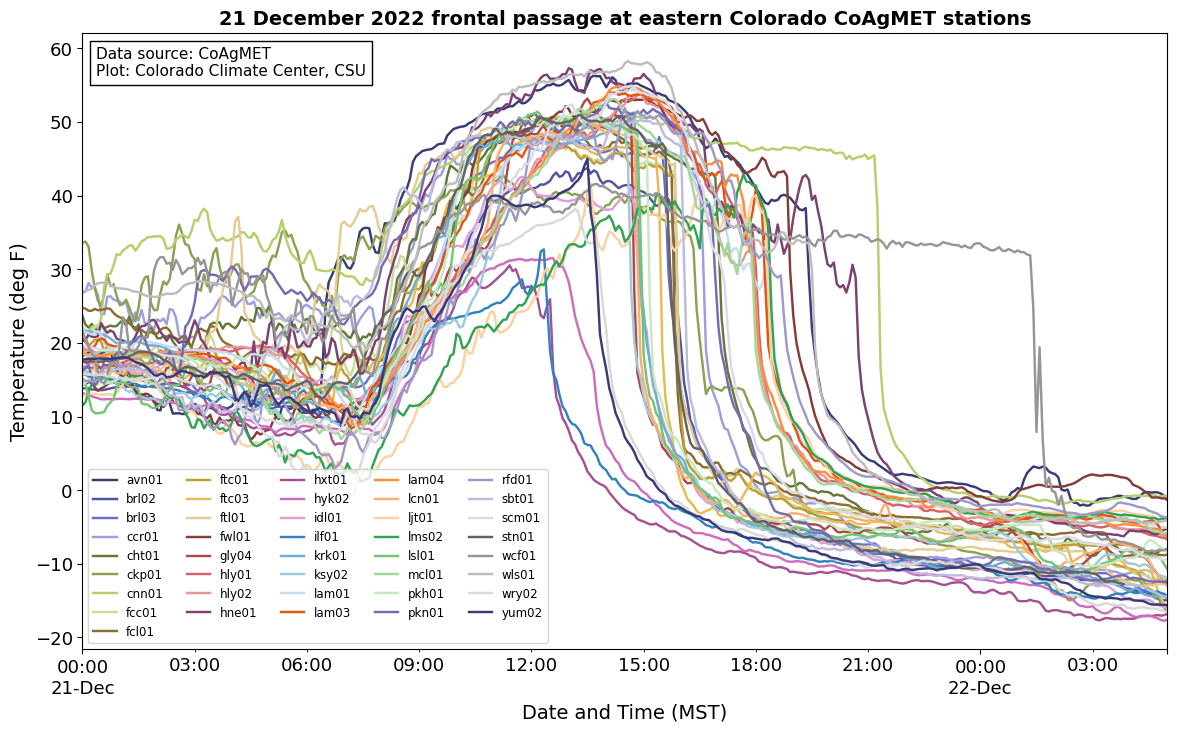

In [8]:
fig, ax = plt.subplots(figsize=(14, 8))

data_east.groupby('Station')['Air Temp'].plot.line(ax=ax, lw=1.75,
                                                  ylabel="Temperature (deg F)")

ax.set_title("21 December 2022 frontal passage at eastern Colorado CoAgMET stations",fontsize=14,fontweight='bold')
ax.set_xlabel("Date and Time (MST)", fontsize=14)
ax.set_ylabel("Temperature (deg F)",fontsize=14)
ax.tick_params(axis='both', which='both',labelsize=13)
#ax.set_xlim()

plt.legend(ncol=5, loc='lower left', fontsize=8.5)

plt.show()

fig.savefig("coagmet_21dec22_fropa.png", dpi=250,facecolor='white',transparent=False,bbox_inches='tight')

### now animate it

In [9]:
### first get the axis limits from the graph above
xlim = ax.get_xlim()
ylim = ax.get_ylim()

### loop over hours
daterange = pd.date_range('2022-12-21 03:00','2022-12-22 04:00', freq='30min')

for time in daterange:
    
    print(time)

    ### set up plot
    fig, ax_loop = plt.subplots(figsize=(14, 8))
    
    data_this = data_east[:str(time)]

    data_this.groupby('Station')['Air Temp'].plot.line(ax=ax_loop, lw=1.75,
                                                      ylabel="Temperature (deg F)")

    ax_loop.set_title("21 December 2022 frontal passage at eastern Colorado CoAgMET stations",fontsize=14,fontweight='bold')
    ax_loop.set_xlabel("Date and Time (MST)", fontsize=14)
    ax_loop.set_ylabel("Temperature (deg F)",fontsize=14)
    ax_loop.tick_params(axis='both', which='both',labelsize=13)
    ax_loop.set_xlim(xlim)
    ax_loop.set_ylim(ylim)

    plt.legend(ncol=5, loc='lower left', fontsize=8.5)

    #plt.show()

    fig.savefig("coagmet_21dec22_fropa_"+time.strftime("%Y%m%d_%H%M")+".png", 
                dpi=150,facecolor='white',transparent=False,bbox_inches='tight')
    
    plt.close('all')

2022-12-21 03:00:00
2022-12-21 03:30:00
2022-12-21 04:00:00
2022-12-21 04:30:00
2022-12-21 05:00:00
2022-12-21 05:30:00
2022-12-21 06:00:00
2022-12-21 06:30:00
2022-12-21 07:00:00
2022-12-21 07:30:00
2022-12-21 08:00:00
2022-12-21 08:30:00
2022-12-21 09:00:00
2022-12-21 09:30:00
2022-12-21 10:00:00
2022-12-21 10:30:00
2022-12-21 11:00:00
2022-12-21 11:30:00
2022-12-21 12:00:00
2022-12-21 12:30:00
2022-12-21 13:00:00
2022-12-21 13:30:00
2022-12-21 14:00:00
2022-12-21 14:30:00
2022-12-21 15:00:00
2022-12-21 15:30:00
2022-12-21 16:00:00
2022-12-21 16:30:00
2022-12-21 17:00:00
2022-12-21 17:30:00
2022-12-21 18:00:00
2022-12-21 18:30:00
2022-12-21 19:00:00
2022-12-21 19:30:00
2022-12-21 20:00:00
2022-12-21 20:30:00
2022-12-21 21:00:00
2022-12-21 21:30:00
2022-12-21 22:00:00
2022-12-21 22:30:00
2022-12-21 23:00:00
2022-12-21 23:30:00
2022-12-22 00:00:00
2022-12-22 00:30:00
2022-12-22 01:00:00
2022-12-22 01:30:00
2022-12-22 02:00:00
2022-12-22 02:30:00
2022-12-22 03:00:00
2022-12-22 03:30:00
